In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
countries = pd.read_csv('countries.csv')
cities = pd.read_csv('cities.csv')
weather = pd.read_csv('daily-weather-cities.csv')

Je vais dans cette partie fusionner les 3 tableaux que l'on a. \
Pour cela, je commence par changer le type de station_id pour qu'il soit le même dans les deux tableaux afin de pouvoir fusionner sur ce critère là.

In [3]:
weather['station_id']=weather['station_id'].astype(str)

Je merge dans un premier temps les tableaux cities et weather:

In [4]:
weather_cities_merged = weather.merge(cities, on='station_id', how='left')
colonnes = list(weather_cities_merged.columns)

J'enlève ici la colonne doublon, et je renomme celle que je garde pour que ce soit plus lisible.

In [5]:
colonnes.remove('city_name_y')
weather_cities_merged['city_name'] = weather_cities_merged['city_name_x'].combine_first(weather_cities_merged['city_name_y'])
weather_cities_merged= weather_cities_merged[colonnes]
weather_cities_merged.rename(columns={'city_name_x': 'city_name'}, inplace=True)

weather_cities_merged.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,country,state,iso2,iso3,latitude,longitude
0,11035,Vienna,1855-02-01,Winter,NaN,-8.5,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria,Wien,AT,AUT,48.200015,16.366639
1,11035,Vienna,1855-02-02,Winter,NaN,-12.1,-3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria,Wien,AT,AUT,48.200015,16.366639
2,11035,Vienna,1855-02-03,Winter,NaN,-17.5,-8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria,Wien,AT,AUT,48.200015,16.366639
3,11035,Vienna,1855-02-04,Winter,NaN,-11.4,-6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria,Wien,AT,AUT,48.200015,16.366639
4,11035,Vienna,1855-02-05,Winter,NaN,-7.5,-1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria,Wien,AT,AUT,48.200015,16.366639


Avant de fusionner avec le tableau countries, enlevons cette fois au préalable les colonnes qui seront doublées:

In [6]:
weather_cities_merged = weather_cities_merged.drop(['iso2', 'country'], axis=1)

In [7]:
weather_cities_countries_merged=weather_cities_merged.merge(countries, on = 'iso3', how='left')
weather_cities_countries_merged.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,...,country,native_name,iso2,population,area,capital,capital_lat,capital_lng,region,continent
0,11035,Vienna,1855-02-01,Winter,NaN,-8.5,-4.0,NaN,NaN,NaN,...,Austria,Österreich,AT,8527230.0,83871.0,Vienna,48.208354,16.372504,Western Europe,Europe
1,11035,Vienna,1855-02-02,Winter,NaN,-12.1,-3.8,NaN,NaN,NaN,...,Austria,Österreich,AT,8527230.0,83871.0,Vienna,48.208354,16.372504,Western Europe,Europe
2,11035,Vienna,1855-02-03,Winter,NaN,-17.5,-8.3,NaN,NaN,NaN,...,Austria,Österreich,AT,8527230.0,83871.0,Vienna,48.208354,16.372504,Western Europe,Europe
3,11035,Vienna,1855-02-04,Winter,NaN,-11.4,-6.3,NaN,NaN,NaN,...,Austria,Österreich,AT,8527230.0,83871.0,Vienna,48.208354,16.372504,Western Europe,Europe
4,11035,Vienna,1855-02-05,Winter,NaN,-7.5,-1.3,NaN,NaN,NaN,...,Austria,Österreich,AT,8527230.0,83871.0,Vienna,48.208354,16.372504,Western Europe,Europe


Le point commun de ces 3 tableaux est la région Western Europe, donc traçons l'évolution des précipitations dans cette région:\
On aurait pu tracer l'évolution de la température, de l'ensoleillement, ...etc.

On commence par convertir la colonne date grâce à pandas pour que le format de la date permette ensuite de créer une colonne date où on sélectionne selon l'année, qui est alors bien formatée.\
Ensuite on sélectionne les données concernant Western Europe pour s'assurer d'avoir les bonnes données, en cas d'erreur faite possiblement avant dans le traitement des données. Puis on enlève les valeurs manquantes de la colonne sur les précipitations. Enfin, on regroupe les données par année et on remet à jour l'index. On peut alors finalement tracer l'évolution du critère choisi (les précipitations) en fonction des années.

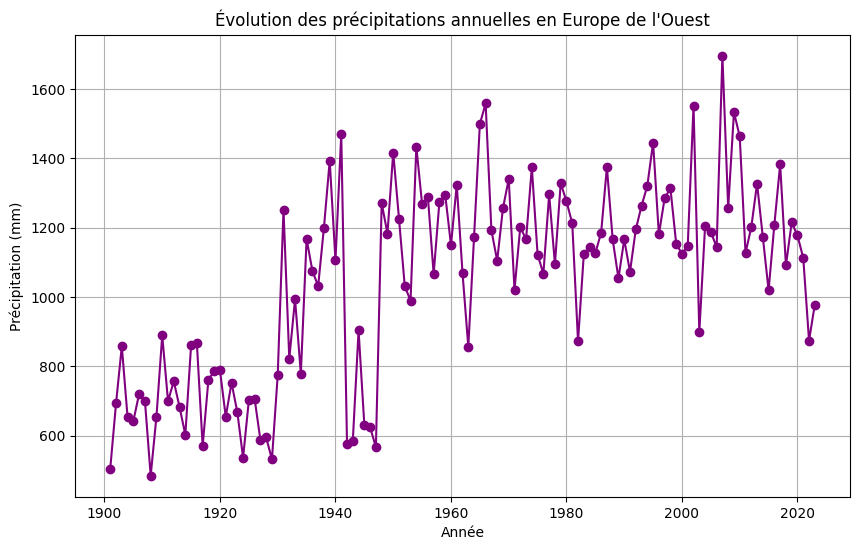

In [9]:
weather_cities_countries_merged['date'] = pd.to_datetime(weather_cities_countries_merged['date'], errors='coerce')
weather_cities_countries_merged['year'] = weather_cities_countries_merged['date'].dt.year

western_europe = weather_cities_countries_merged[weather_cities_countries_merged['region'] == 'Western Europe']
western_europe = western_europe.dropna(subset=['precipitation_mm']) #on enlève les valeurs manquantes

precipitations = western_europe.groupby('year')['precipitation_mm'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(precipitations['year'], precipitations['precipitation_mm'], marker='o', color='purple')
plt.title("Évolution des précipitations annuelles en Europe de l'Ouest")
plt.xlabel('Année')
plt.ylabel('Précipitation (mm)')
plt.grid(True)
plt.show()

On remarque une forte augmentation des précipitationsen Europe de l'Ouest entre 1930 et 1940 (passage de 700mm de précipitation / an environ à 1200mm/an), avec ensuite un pic bas entre 1940 et 1950, suivi d'un retour des précipitations de plus grande quantité en 1950 qui est ensuite resté stable jusqu'à 2020.

Maintenant, il peut être intéressant de voir l'évolution par année et par saison pour évaluer la différence entre les saisons.\
Cette fois on applique alors la méthode groupby aux colonnes année ET saison, on affiche la courbe de chaque saison sur le même graphique.

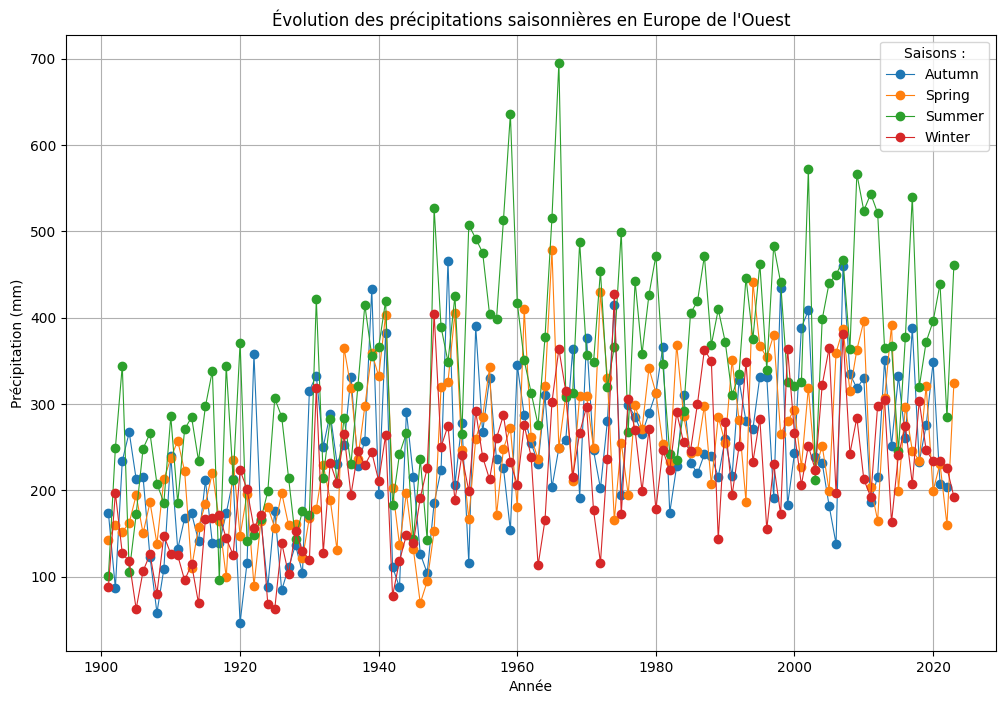

In [10]:
precipitations_saison = western_europe.groupby(['year', 'season'])['precipitation_mm'].sum().reset_index()

plt.figure(figsize=(12, 8))
saisons = precipitations_saison['season'].unique()
for saison in saisons :
    donnee_saison = precipitations_saison[precipitations_saison['season'] == saison]
    plt.plot(donnee_saison['year'], donnee_saison['precipitation_mm'], marker='o', label=saison, linewidth=0.8)

plt.title("Évolution des précipitations saisonnières en Europe de l'Ouest")
plt.xlabel('Année')
plt.ylabel('Précipitation (mm)')
plt.legend(title="Saisons :")
plt.grid(True)
plt.show()



Une première observation est que les précipitations sont plus importantes en été, et qu'elles sont en quantité assez similaires en automne, hiver et printemps.\
Elles ont augmenté de manière similaires au cours du temps pour ces 3 saisons, et en été, l'augmentation des précipitations est plus importante. Toutefois, une certaine stabilité est atteinte depuis les années 1970. 